#### Importing Relevant Libraries

In [388]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans



### Data Load and Exploration

In [389]:
#Loading data into dataframe
df = pd.read_csv("wine.csv")

#Actual data snapshot
display(df.head(10))

#Looking at the shape of data
print("Shape of the data is:",df.shape,"\n")

#Looking at data description
display(df.describe())

#Looking at data info
print("Data information:")
print(df.info())



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


Shape of the data is: (6497, 13) 



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


### Data Preparation

In [390]:
df_X =df.drop(["color","quality"], axis= 1)

In [391]:
# Scaling the X variables
scale = StandardScaler()
df_X_scaled = scale.fit_transform(df_X)

### Clustered Correlation Matrix

C:\Users\naray\AppData\Local\Temp\ipykernel_18056\3115705553.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cluster_corr(df.corr()), annot=True,)


<Axes: >

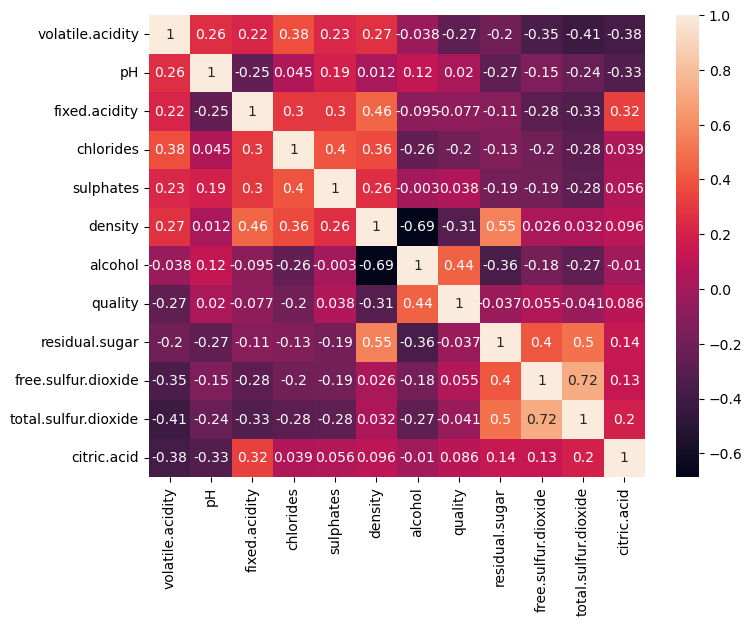

In [392]:
# Creating cluster in correlation array
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

# Clustered Correlation Matrix
plt.figure(figsize=(8,6)) 
sns.heatmap(cluster_corr(df.corr()), annot=True,)

### PCA

<Axes: >

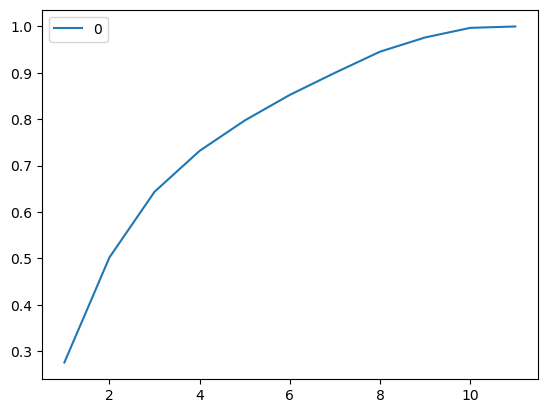

In [393]:
#Finding optimal PCs
dic ={}
for i in range(1,12):
    pca = PCA(n_components = i)
    df_X_PCA = pca.fit_transform(df_X_scaled)
    explained_variance = pca.explained_variance_ratio_
    dic[i] = explained_variance.sum()
pd.Series(dic).to_frame().plot()

In [394]:
pca = PCA(n_components = 2)
df_X_PCA = pca.fit_transform(df_X_scaled)
explained_variance = pca.explained_variance_ratio_
variance_df =pd.DataFrame(explained_variance, columns= ['Variance'])
variance_df['Cum_Sum'] = np.cumsum(pca.explained_variance_ratio_)
pc_list = ["PC"+str(i) for i in list(range(1, pca.n_features_+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, pca.components_)))
loadings_df['Features'] = df_X.columns.values
loadings_df = loadings_df.set_index('Features')
loadings_df.reset_index()

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,Features,PC1,PC2
0,fixed.acidity,-0.238799,0.336355
1,volatile.acidity,-0.380757,0.117550
2,citric.acid,0.152388,0.183299
3,residual.sugar,0.345920,0.329914
4,chlorides,-0.290113,0.315258
5,free.sulfur.dioxide,0.430914,0.071933
6,total.sulfur.dioxide,0.487418,0.087266
7,density,-0.044937,0.584037
8,pH,-0.218686,-0.155869
9,sulphates,-0.294135,0.191716


In [395]:
df_pc=pd.DataFrame(df_X_PCA,columns=['PC1','PC2'])
df_pc=df_pc.merge(df[['color','quality']], right_index = True, left_index=True, how = 'inner')
df_pc

,PC1,PC2,color,quality
0,-3.205996,0.416523,red,5
1,-3.039051,1.107462,red,5
2,-3.071893,0.878964,red,5
3,-1.571262,2.112545,red,6
4,-3.205996,0.416523,red,5
...,...,...,...,...
6492,-0.062824,-1.934205,white,6
6493,1.866989,0.524431,white,5
6494,0.571133,-0.722662,white,6
6495,0.090052,-3.545780,white,7


### Clustering - Wine Color

In [396]:
# K Means++ - For wine color
kmeans = KMeans(n_clusters=2)
kmeans.init = "k-means++"
kmeans.fit(df_X_PCA)
kmean_clusters_color = kmeans.predict(df_X_PCA) 
kmean_clusters_color = pd.DataFrame(kmean_clusters_color,columns=["Predicted_Clusters_color"])
df_pc =df_pc.merge(kmean_clusters_color,how="inner",left_index=True, right_index=True)
df_pc

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,color,quality,Predicted_Clusters_color
0,-3.205996,0.416523,red,5,0
1,-3.039051,1.107462,red,5,0
2,-3.071893,0.878964,red,5,0
3,-1.571262,2.112545,red,6,0
4,-3.205996,0.416523,red,5,0
...,...,...,...,...,...
6492,-0.062824,-1.934205,white,6,1
6493,1.866989,0.524431,white,5,1
6494,0.571133,-0.722662,white,6,1
6495,0.090052,-3.545780,white,7,1


### Clustering - Wine Quality

In [397]:
#K Means++ - For wine Quality
kmeans = KMeans(n_clusters=5)
kmeans.init = "k-means++"
kmeans.fit(df_X_PCA)
kmean_clusters_quality = kmeans.predict(df_X_PCA) 
kmean_clusters_quality = pd.DataFrame(kmean_clusters_quality,columns=["Predicted_Clusters_Quality"])
df_pc =df_pc.merge(kmean_clusters_quality,how="inner",left_index=True, right_index=True)
df_pc

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,color,quality,Predicted_Clusters_color,Predicted_Clusters_Quality
0,-3.205996,0.416523,red,5,0,4
1,-3.039051,1.107462,red,5,0,0
2,-3.071893,0.878964,red,5,0,4
3,-1.571262,2.112545,red,6,0,0
4,-3.205996,0.416523,red,5,0,4
...,...,...,...,...,...,...
6492,-0.062824,-1.934205,white,6,1,1
6493,1.866989,0.524431,white,5,1,2
6494,0.571133,-0.722662,white,6,1,3
6495,0.090052,-3.545780,white,7,1,1


Text(0.5, 1.0, 'Predicted')

<Figure size 1200x1200 with 0 Axes>

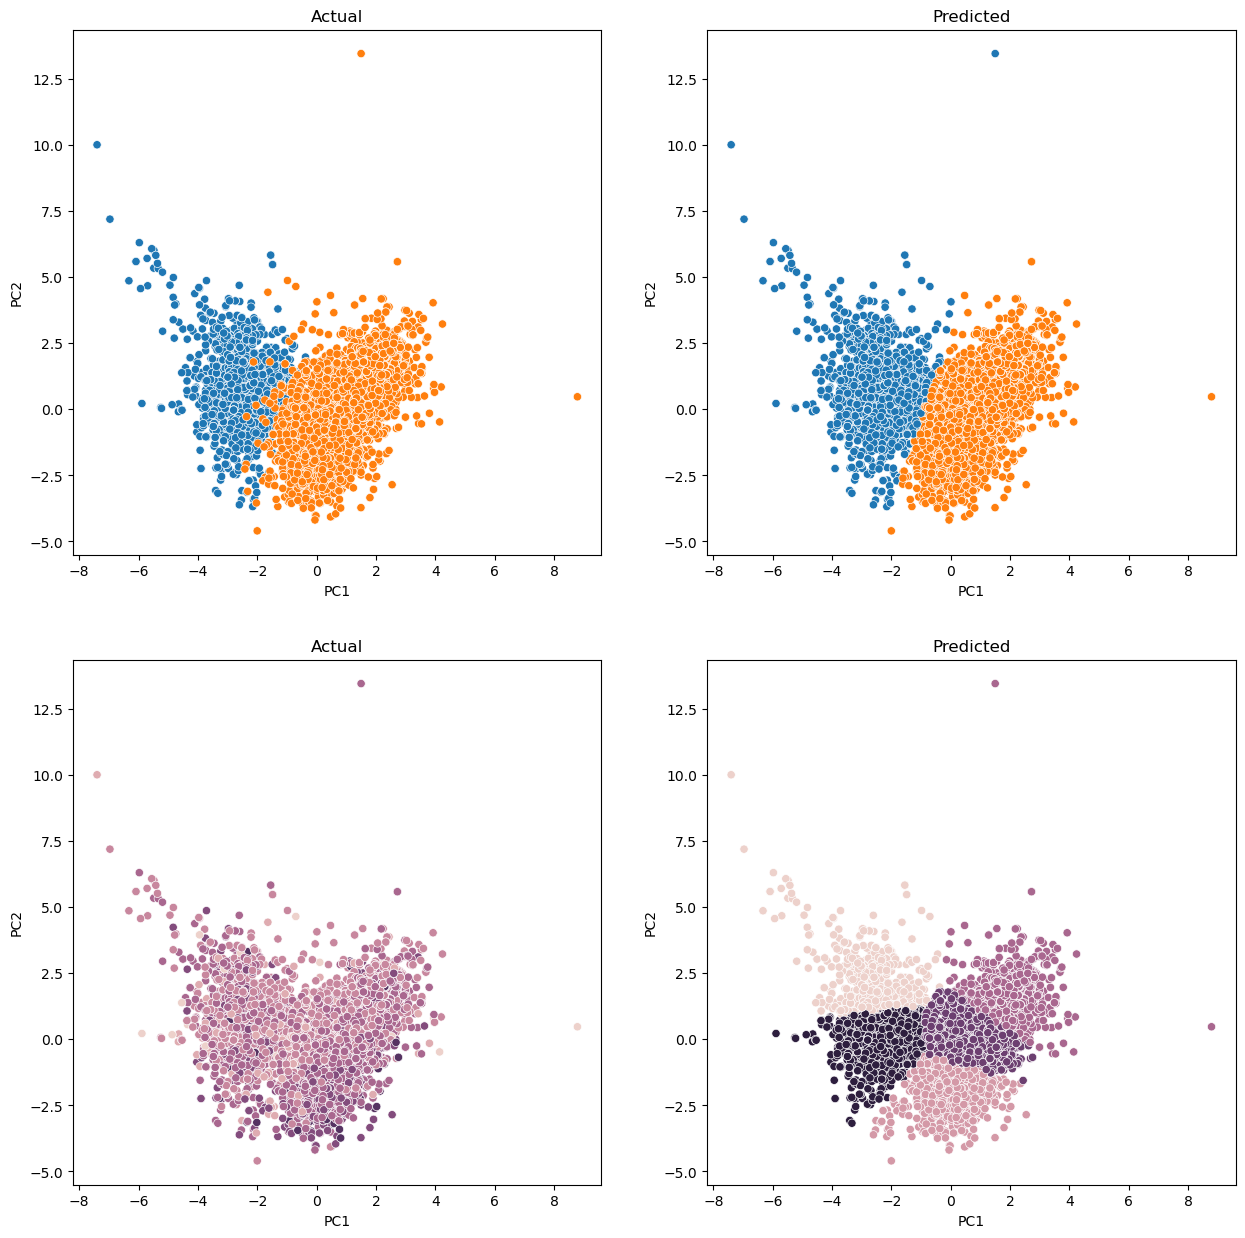

In [398]:
plt.figure(figsize=(12,12))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15 , 15))
sns.scatterplot(x="PC1", y="PC2", data=df_pc, hue='color', legend=False, ax=axes[0][0],)
axes[0][0].set_title('Actual')
sns.scatterplot(x="PC1", y="PC2", data=df_pc, hue='Predicted_Clusters_color', legend=False, ax=axes[0][1])
axes[0][1].set_title('Predicted')


sns.scatterplot(x="PC1", y="PC2", data=df_pc, hue='quality', legend=False, ax=axes[1][0],)
axes[1][0].set_title('Actual')
sns.scatterplot(x="PC1", y="PC2", data=df_pc, hue='Predicted_Clusters_Quality', legend=False, ax=axes[1][1])
axes[1][1].set_title('Predicted')


### tSNE

In [399]:
tsne = TSNE(n_components=2, random_state=42)
df_tsne_result = tsne.fit_transform(df_X_scaled)

In [400]:
df_tsne=pd.DataFrame(df_tsne_result,columns=['tsne1', 'tsne2'])

df_tsne

,tsne1,tsne2
0,-76.951897,-2.807838
1,-74.996696,9.224433
2,-74.384491,9.413972
3,-59.402363,49.558704
4,-76.951767,-2.806930
...,...,...
6492,-18.237902,-43.073292
6493,26.398891,33.336750
6494,-10.044542,14.242876
6495,-15.846848,-67.935654


### Clustering - Wine Color

In [401]:
# K Means++ - For wine color
kmeans = KMeans(n_clusters=2)
kmeans.init = "k-means++"
kmeans.fit(df_tsne)
kmean_clusters_color_tsne = kmeans.predict(df_tsne) 
kmean_clusters_color_tsne = pd.DataFrame(kmean_clusters_color_tsne,columns=["Predicted_Clusters_color"])
df_tsne=df_tsne.merge(kmean_clusters_color_tsne,how="inner",left_index=True, right_index=True)
df_tsne

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,tsne1,tsne2,Predicted_Clusters_color
0,-76.951897,-2.807838,1
1,-74.996696,9.224433,1
2,-74.384491,9.413972,1
3,-59.402363,49.558704,1
4,-76.951767,-2.806930,1
...,...,...,...
6492,-18.237902,-43.073292,1
6493,26.398891,33.336750,0
6494,-10.044542,14.242876,1
6495,-15.846848,-67.935654,1


### Clustering - Wine Quality

In [402]:
# K Means++ - For wine color
kmeans = KMeans(n_clusters=5)
kmeans.init = "k-means++"
kmeans.fit(df_tsne)
kmean_clusters_quality_tsne = kmeans.predict(df_tsne) 
kmean_clusters_quality_tsne = pd.DataFrame(kmean_clusters_quality_tsne,columns=["Predicted_Clusters_quality"])
df_tsne=df_tsne.merge(kmean_clusters_quality_tsne,how="inner",left_index=True, right_index=True)
df_tsne

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,tsne1,tsne2,Predicted_Clusters_color,Predicted_Clusters_quality
0,-76.951897,-2.807838,1,2
1,-74.996696,9.224433,1,2
2,-74.384491,9.413972,1,2
3,-59.402363,49.558704,1,3
4,-76.951767,-2.806930,1,2
...,...,...,...,...
6492,-18.237902,-43.073292,1,4
6493,26.398891,33.336750,0,1
6494,-10.044542,14.242876,1,3
6495,-15.846848,-67.935654,1,4


In [403]:
df_tsne=df_tsne.merge(df[['color','quality']], right_index = True, left_index=True, how = 'inner')
df_tsne

,tsne1,tsne2,Predicted_Clusters_color,Predicted_Clusters_quality,color,quality
0,-76.951897,-2.807838,1,2,red,5
1,-74.996696,9.224433,1,2,red,5
2,-74.384491,9.413972,1,2,red,5
3,-59.402363,49.558704,1,3,red,6
4,-76.951767,-2.806930,1,2,red,5
...,...,...,...,...,...,...
6492,-18.237902,-43.073292,1,4,white,6
6493,26.398891,33.336750,0,1,white,5
6494,-10.044542,14.242876,1,3,white,6
6495,-15.846848,-67.935654,1,4,white,7


Text(0.5, 1.0, 'Predicted')

<Figure size 1200x1200 with 0 Axes>

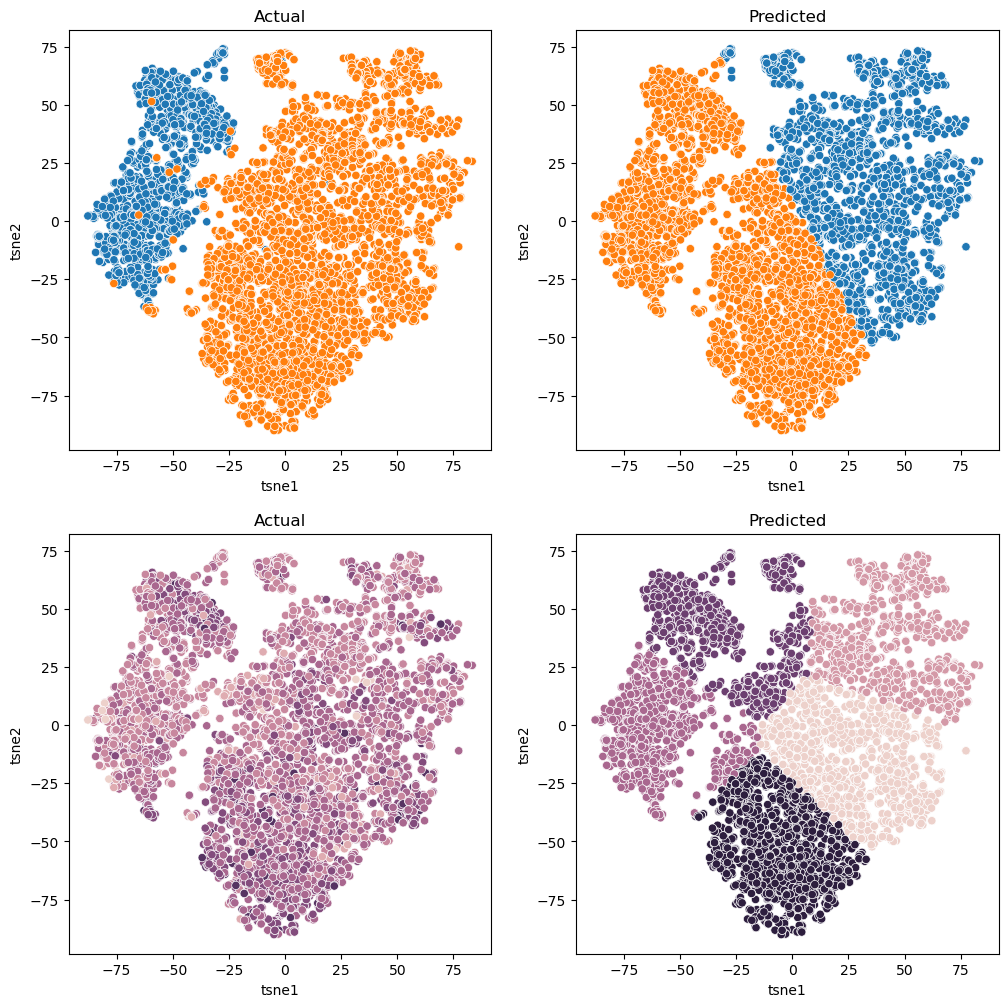

In [404]:
plt.figure(figsize=(12,12))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.scatterplot(x="tsne1", y="tsne2", data=df_tsne, hue='color', legend=False, ax=axes[0][0],)
axes[0][0].set_title('Actual')
sns.scatterplot(x="tsne1", y="tsne2", data=df_tsne, hue='Predicted_Clusters_color', legend=False, ax=axes[0][1])
axes[0][1].set_title('Predicted')


sns.scatterplot(x="tsne1", y="tsne2", data=df_tsne, hue='quality', legend=False, ax=axes[1][0],)
axes[1][0].set_title('Actual')
sns.scatterplot(x="tsne1", y="tsne2", data=df_tsne, hue='Predicted_Clusters_quality', legend=False, ax=axes[1][1])
axes[1][1].set_title('Predicted')
